# Operational Chroma Scan

In [1]:
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.figsize'] = [5.0, 5.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['lines.linewidth'] = 1

## Function declarations

In [3]:
def harmonic_fn(x, a, b, c, d):
    return a + b*np.cos(c + 2*np.pi*d*x)

In [4]:
def quadratic(x, a, m, c):
    return a*x**2 + x*m + c

In [5]:
def cubic(x, a, m, c, b):
    return a*x**2 + x*m + c + b*x**3

In [6]:
def Md_fit(x, a, b, c, d):
        return a + b*np.cos(c*x+d)

In [7]:
def Md_ramp_fit(x, a, b, c, d):
    return a + b*(x-1)*np.cos(c*(x-1)+d)

In [8]:
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [9]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

### Conversion from dpp to dE

In [91]:
def dpp_from_dE(dE, beta = 0.915839281848, E=2336654575.29):
     return (dE / (E*1E-9 * beta**2))

def dE_from_dpp(dpp, beta = 0.915839281848, E=2336654575.29):
     return (dpp * E*1E-9 * beta**2)
    

## Plot dpp vs dE

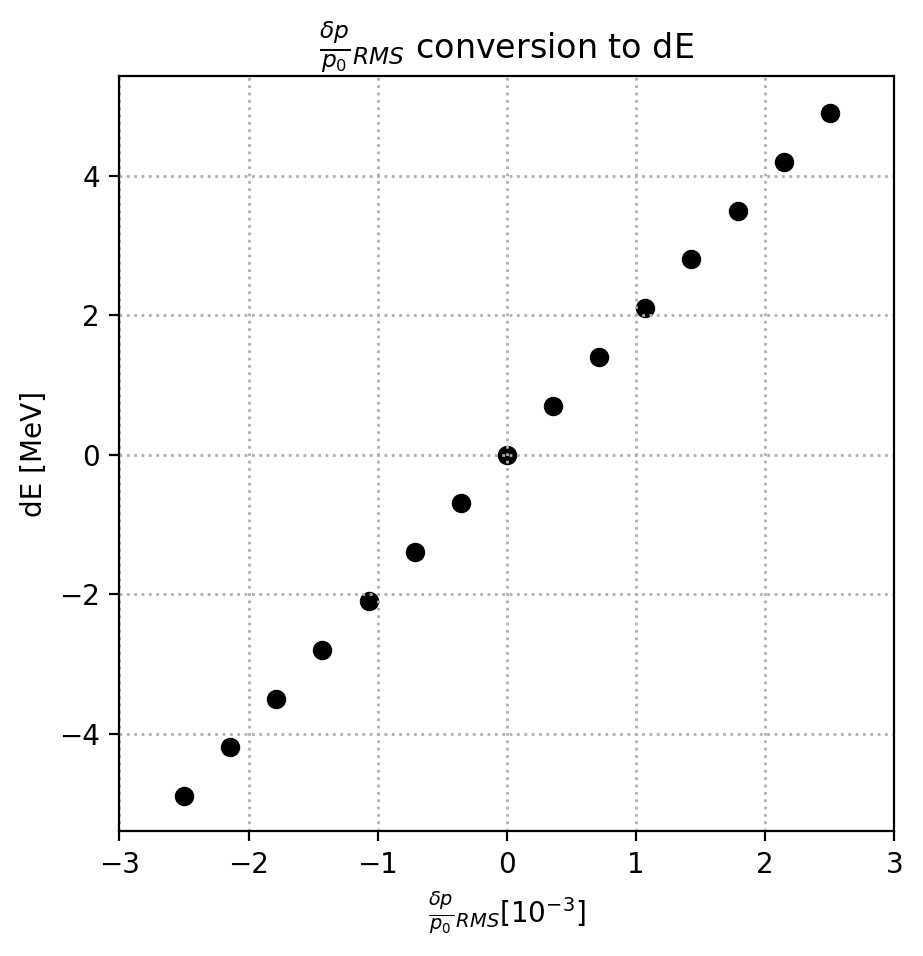

In [92]:
num_sims = 15
dps = np.linspace(-2.5E-3, 2.5E-3, num_sims)



fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = r'$\frac{\delta p}{p_0}_{RMS}$ conversion to dE'
ax1.set_title(tit);

ax1.set_xlabel(r'$\frac{\delta p}{p_0}_{RMS} [10^{-3}]$');
ax1.set_ylabel('dE [MeV]');


for dpp in dps:
    ax1.scatter(dpp*1E3, dE_from_dpp(dpp)*1E3, color='k');
        
#ax1.legend(loc=4, title=legend_label);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-5,5);
ax1.set_xlim(-3,3);

savename = 'dpp_dE.png'
plt.savefig(savename, dpi = 800);

## Load initial bunch and plot longitudinal distribution

In [93]:
ddo = dict()

ddo = add_input_file(ddo, '/home/HR/Documents/PS_Transfer/01_Generate_Distn/Bunches/PyORBIT_Tomo_Bunch_Manual_Twiss_Nmp_50000_PS_Lattice_Tune_6218_624_BSG52_Op.mat', 'OP')

	Added output data from  /home/HR/Documents/PS_Transfer/01_Generate_Distn/Bunches/PyORBIT_Tomo_Bunch_Manual_Twiss_Nmp_50000_PS_Lattice_Tune_6218_624_BSG52_Op.mat 	 dictionary key:  OP


In [94]:
ddo['OP']['particles']['dE'][0][0][0]

array([ 0.00013189, -0.00033822,  0.00235114, ..., -0.00318665,
       -0.00275888,  0.00118901])

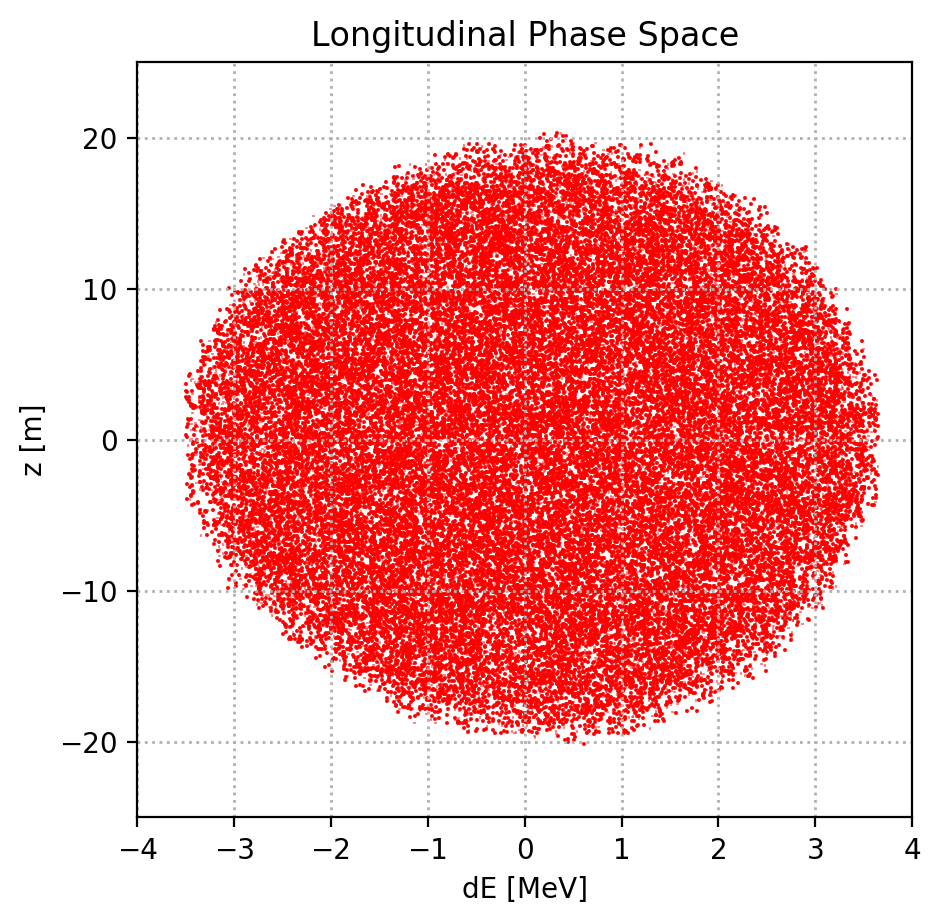

In [95]:
parameter2 = 'dE'
parameter1 = 'z'
multi2 = 1E3
multi1 = 1

y = np.array(ddo['OP']['particles'][parameter1][0][0][0]*multi1)
x = np.array(ddo['OP']['particles'][parameter2][0][0][0]*multi2)

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = 'Longitudinal Phase Space'
ax1.set_title(tit);

ax1.set_ylabel('z [m]');
ax1.set_xlabel('dE [MeV]');

s = np.ones(len(x))*0.1
ax1.scatter(x, y, color='r', marker=',', s=s);
        
#ax1.legend(loc=4, title=legend_label);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-4, 4);
ax1.set_ylim(-25, 25);

#savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
#plt.savefig(savename, dpi = 800);

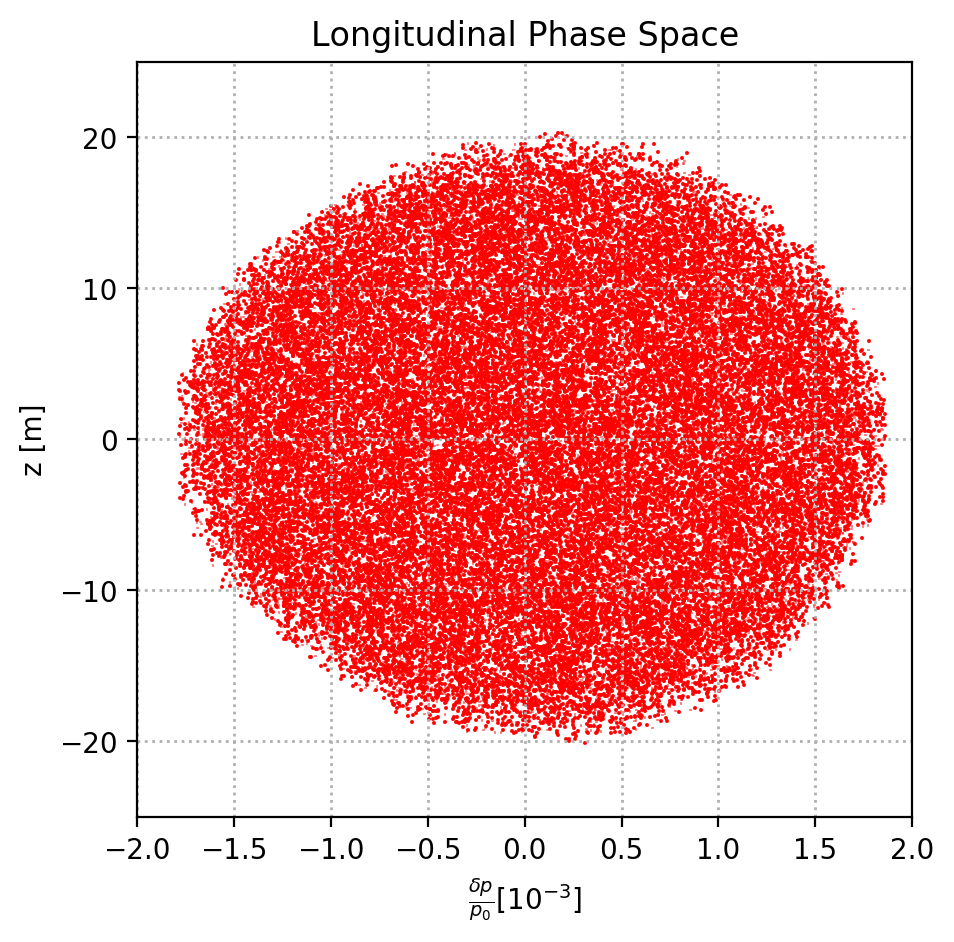

In [96]:
parameter2 = 'dE'
parameter1 = 'z'
multi2 = 1E3
multi1 = 1

y = np.array(ddo['OP']['particles'][parameter1][0][0][0]*multi1)
x = np.array(dpp_from_dE(ddo['OP']['particles'][parameter2][0][0][0]*multi2))

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = 'Longitudinal Phase Space'
ax1.set_title(tit);

ax1.set_ylabel('z [m]');
ax1.set_xlabel(r'$\frac{\delta p}{p_0} [10^{-3}]$');

s = np.ones(len(x))*0.1
ax1.scatter(x, y, color='r', marker=',', s=s);
        
#ax1.legend(loc=4, title=legend_label);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-2, 2);
ax1.set_ylim(-25, 25);

#savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
#plt.savefig(savename, dpi = 800);

## Calculate dpp from bunch

In [106]:
parameter2 = 'dE'
multi2 = 1E3
dE = np.array(ddo['OP']['particles'][parameter2][0][0][0]*multi2)
dpp = np.array(dpp_from_dE(ddo['OP']['particles'][parameter2][0][0][0]*multi2))

In [107]:
dE_rms = np.sqrt((np.mean(dE**2)))
dpp_rms = np.sqrt((np.mean(dpp**2)))

In [108]:
print 'dE_RMS = ', dE_rms, ' MeV'
print 'dpp_RMS = ', dpp_rms,'*1E-3' 

dE_RMS =  1.6994901910412996  MeV
dpp_RMS =  0.8671327958376126 *1E-3


## From PyORBIT Script - definition of dpp

In [109]:
# dpp = np.sqrt(bta.getCorrelation(5,5)) / (b.getSyncParticle().gamma()*b.mass()*b.getSyncParticle().beta()**2)
correlation = np.mean(dE**2) - (np.mean(dE) * np.mean(dE)) 

gamma = 2.49038072769
beta = 0.915839281848
mass = 0.938272046

dpp_pyorbit = np.sqrt(correlation) / gamma * mass * beta**2

In [110]:
print 'dpp_pyorbit = ', dpp_pyorbit,'* 1E-3' 

dpp_pyorbit =  0.5360462187377966 * 1E-3


# Load output data

In [28]:
num_sims = 15
dps = np.linspace(-2.5E-3, 2.5E-3, num_sims)

ddo = dict()

ddo = add_input_file(ddo, '01_01/output/output.mat', round_sig(dps[0]))
ddo = add_input_file(ddo, '01_02/output/output.mat', round_sig(dps[1]))
ddo = add_input_file(ddo, '01_03/output/output.mat', round_sig(dps[2]))
ddo = add_input_file(ddo, '01_04/output/output.mat', round_sig(dps[3]))
ddo = add_input_file(ddo, '01_05/output/output.mat', round_sig(dps[4]))
ddo = add_input_file(ddo, '01_06/output/output.mat', round_sig(dps[5]))
ddo = add_input_file(ddo, '01_07/output/output.mat', round_sig(dps[6]))
ddo = add_input_file(ddo, '01_08/output/output.mat', dps[7])
ddo = add_input_file(ddo, '01_09/output/output.mat', round_sig(dps[8]))
ddo = add_input_file(ddo, '01_10/output/output.mat', round_sig(dps[9]))
ddo = add_input_file(ddo, '01_11/output/output.mat', round_sig(dps[10]))
ddo = add_input_file(ddo, '01_12/output/output.mat', round_sig(dps[11]))
ddo = add_input_file(ddo, '01_13/output/output.mat', round_sig(dps[12]))
ddo = add_input_file(ddo, '01_14/output/output.mat', round_sig(dps[13]))
ddo = add_input_file(ddo, '01_15/output/output.mat', round_sig(dps[14]))

	Added output data from  01_01/output/output.mat 	 dictionary key:  -0.0025
	Added output data from  01_02/output/output.mat 	 dictionary key:  -0.0021
	Added output data from  01_03/output/output.mat 	 dictionary key:  -0.0018
	Added output data from  01_04/output/output.mat 	 dictionary key:  -0.0014
	Added output data from  01_05/output/output.mat 	 dictionary key:  -0.0011
	Added output data from  01_06/output/output.mat 	 dictionary key:  -0.00071
	Added output data from  01_07/output/output.mat 	 dictionary key:  -0.00036
	Added output data from  01_08/output/output.mat 	 dictionary key:  0.0
	Added output data from  01_09/output/output.mat 	 dictionary key:  0.00036
	Added output data from  01_10/output/output.mat 	 dictionary key:  0.00071
	Added output data from  01_11/output/output.mat 	 dictionary key:  0.0011
	Added output data from  01_12/output/output.mat 	 dictionary key:  0.0014
	Added output data from  01_13/output/output.mat 	 dictionary key:  0.0018
	Added output dat

# Plot and name parameters etc

In [35]:
save_folder = 'Plots/Operational/0/'
CO_offset = '0'

sc = 'NoSC'
legend_label = r'$\frac{\delta p}{p_0}$'
main_label = 'OP_Chroma'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 30
zoom_turns = 15
turns = [0, 1, 10, 50, 100, 874, 2185, 2199]
betagamma = 2.492104532 * 0.9159915293879255

In [12]:
ddo[0].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'orbit_x_max',
 'turn_time',
 'n_mp',
 'min_xp',
 'orbit_x_min',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'min_y',
 'mu_y',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'kurtosis_xp',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'mu_z',
 'mean_xp',
 'min_z',
 'kurtosis_dE',
 'orbit_y_max',
 'orbit_y_min',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

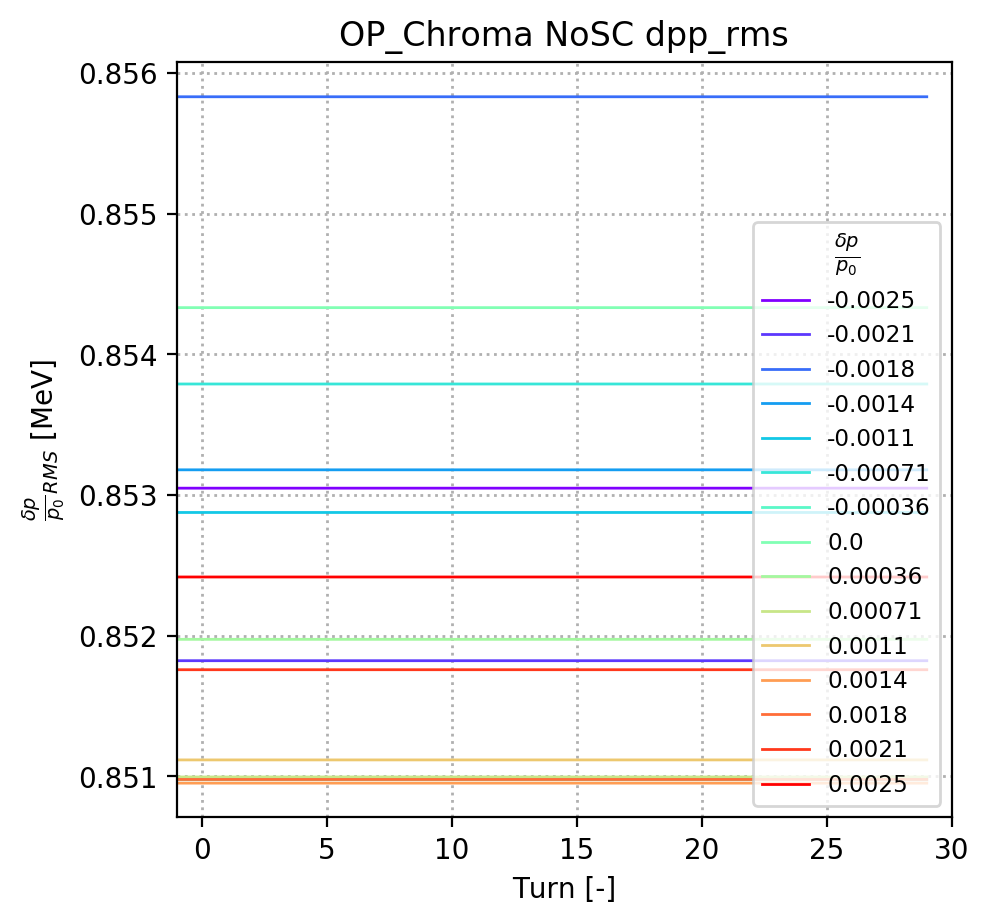

In [37]:
parameter = 'dpp_rms'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\delta p}{p_0}_{RMS}$ [MeV]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):
        ax1.plot(ddo[key]['turn'][0], ddo[key][parameter][0]*1E3, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot);
#ax1.set_ylim(0.82, 0.87);

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

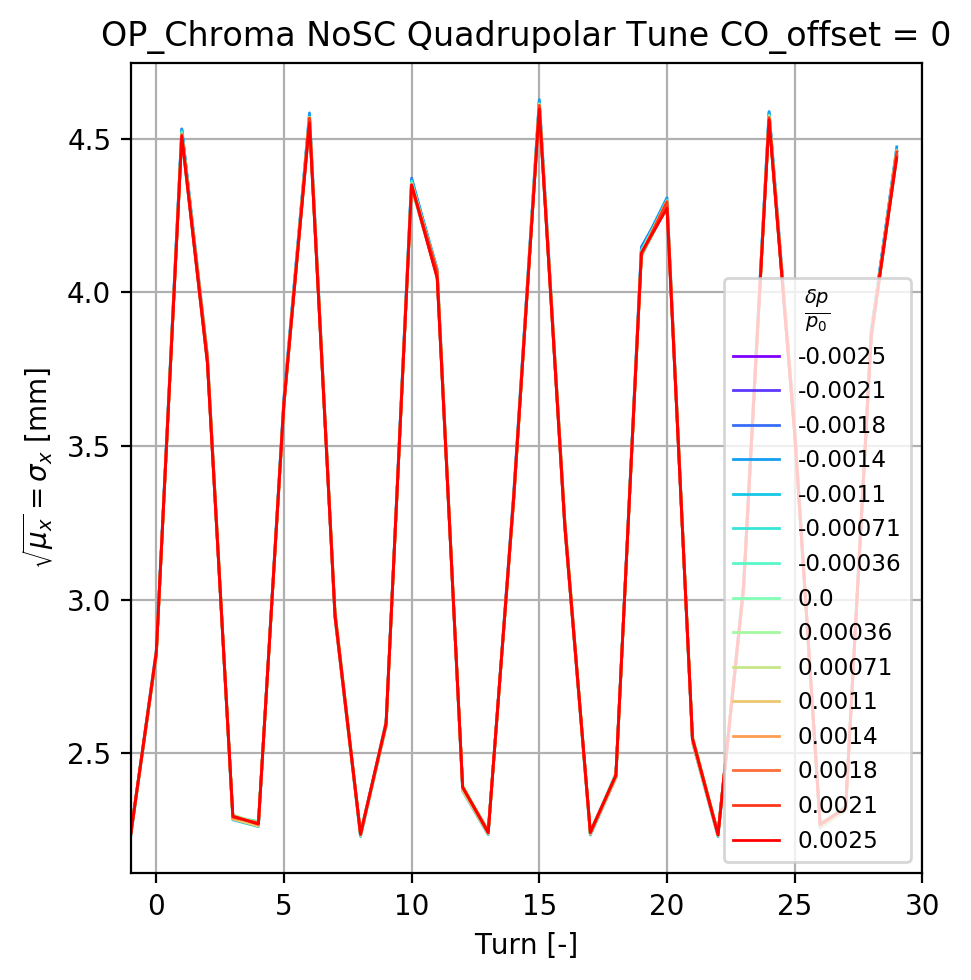

In [13]:
parameter = 'mu_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' Quadrupolar Tune CO_offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$\sqrt{\mu_x} = \sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):
        ax1.plot(ddo[key]['turn'][0], np.sqrt(ddo[key][parameter][0])*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30)

savename = save_folder + 'sig_x.png'
plt.tight_layout()
#plt.savefig(savename, dpi = 800);

# Save frequencies using different methods

In [14]:
qx_harmonic = []
qy_harmonic = []

qx_fft = []
qy_fft = []

qx_naff = []
qy_naff = []


 Momentum Offset =  -0.0025
 Offset =  3.220574459444572  mm
 Amplitude =  1.1896807174810797  mm
 Frequency =  0.2185
 Phase offset =  0.5067025036853844

 Momentum Offset =  -0.0021
 Offset =  3.2169226489157263  mm
 Amplitude =  1.1814767203459133  mm
 Frequency =  0.2185
 Phase offset =  0.5067353180646788

 Momentum Offset =  -0.0018
 Offset =  3.2244411254097214  mm
 Amplitude =  1.194683524469617  mm
 Frequency =  0.2185
 Phase offset =  0.5076793323734987

 Momentum Offset =  -0.0014
 Offset =  3.2252555743894455  mm
 Amplitude =  1.1971640118111653  mm
 Frequency =  0.2185
 Phase offset =  0.506273141605794

 Momentum Offset =  -0.0011
 Offset =  3.2171401362244216  mm
 Amplitude =  1.1938866017758047  mm
 Frequency =  0.2185
 Phase offset =  0.506921175335282

 Momentum Offset =  -0.00071
 Offset =  3.22176944687335  mm
 Amplitude =  1.1893014964943476  mm
 Frequency =  0.2185
 Phase offset =  0.50645336800665

 Momentum Offset =  -0.00036
 Offset =  3.217517320946984  mm
 A

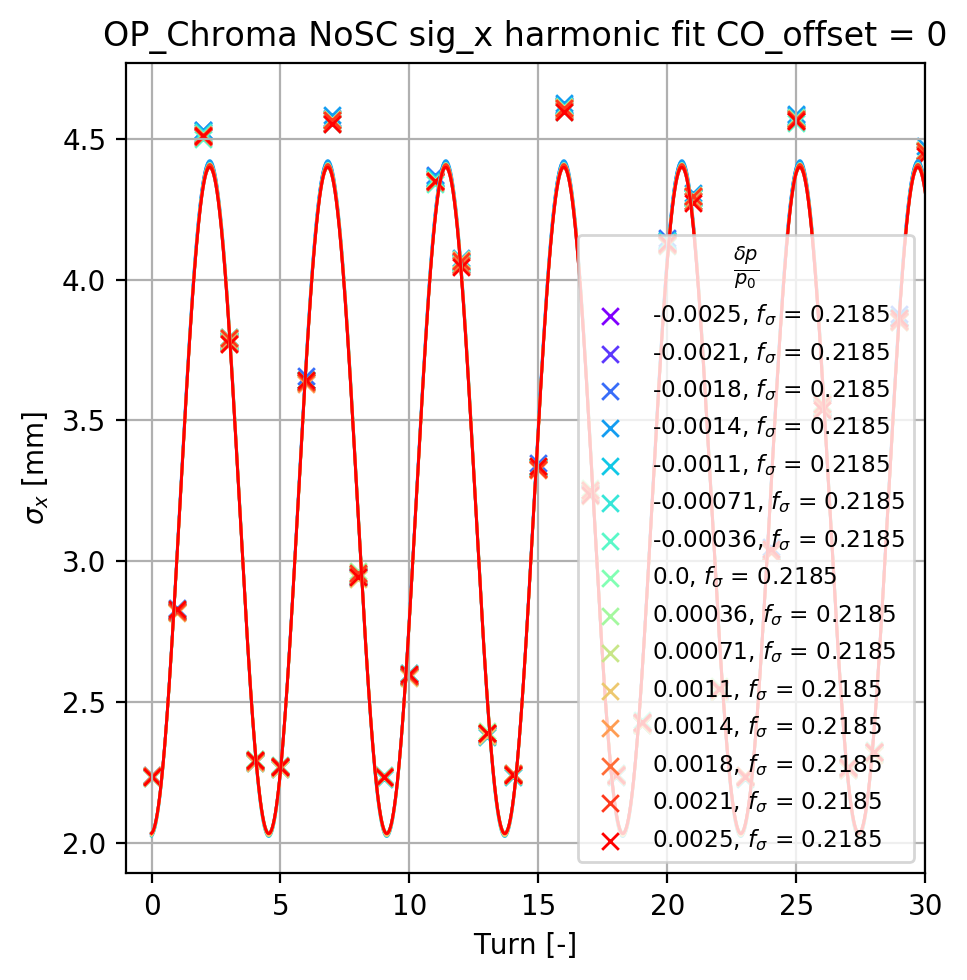

In [15]:
parameter = 'sig_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' harmonic fit CO_offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)
y_fine = np.array(range(0, 30000))*0.001
#print y_fine

for key, value in sorted(ddo.iteritems()):
#key=0

    y = np.array(range(0, 31))
    x = np.array(ddo[key][parameter][0]*1E3)

    mean_x = np.mean(x)    
    if mean_x < 0.0 :
        offset_min = 1.5 * np.mean(x)
        offset_max = 0.5 * np.mean(x)
    else:
        offset_min = 0.5 * np.mean(x)
        offset_max = 1.5 * np.mean(x)    

    amp_min = 0.5 * 0.999 * (np.max(x) - np.min(x))
    amp_max = 0.5 * 1.001 * (np.max(x) - np.min(x))

    freq_min = 0.0
    freq_max = 0.49

    popt, pcov = curve_fit(harmonic_fn, ddo[key]['turn'][0]+1, x, method = 'trf', bounds =((offset_min,amp_min,-np.inf,freq_min),(offset_max,amp_max,np.inf,freq_max)))

    print '\n Momentum Offset = ', key
    print ' Offset = ', popt[0], ' mm'
    print ' Amplitude = ', popt[1], ' mm'
    print ' Frequency = ', round(popt[3],4)
    print ' Phase offset = ', popt[2] / (2*np.pi)

    ax1.plot(y_fine, harmonic_fn(y_fine, popt[0], popt[1], popt[2], popt[3]), color=colors[c_it])
    lab_ = str(str(key) + r', $f_{\sigma}$ = ' + str(round(popt[3],4)))
    ax1.scatter(ddo[key]['turn'][0]+1, x, label=lab_, color=colors[c_it], marker='x');
    c_it = c_it + 1
    
    #qy_harmonic.append(popt[3])
        
ax1.legend(fontsize='small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30);
#ax1.set_ylim(-2,2);

savename = save_folder + 'qx_quadrupolar_harmonic.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);


 Momentum Offset =  -0.0025
 Offset =  2.968278504569004  mm
 Amplitude =  0.01782012097115691  mm
 Frequency =  0.2055
 Phase offset =  0.1552290455017903

 Momentum Offset =  -0.0021
 Offset =  2.9733593688603555  mm
 Amplitude =  0.021622027789947592  mm
 Frequency =  0.2054
 Phase offset =  0.1516999274382647

 Momentum Offset =  -0.0018
 Offset =  2.9764081458219604  mm
 Amplitude =  0.017267481084971573  mm
 Frequency =  0.2062
 Phase offset =  0.15469490183661078

 Momentum Offset =  -0.0014
 Offset =  2.973510997690869  mm
 Amplitude =  0.023324153930884918  mm
 Frequency =  0.2061
 Phase offset =  0.15497275642043992

 Momentum Offset =  -0.0011
 Offset =  2.9698531297959323  mm
 Amplitude =  0.02030818726295312  mm
 Frequency =  0.2056
 Phase offset =  0.15443442880082023

 Momentum Offset =  -0.00071
 Offset =  2.9804399775731305  mm
 Amplitude =  0.020957107230513184  mm
 Frequency =  0.2055
 Phase offset =  0.15371081176154808

 Momentum Offset =  -0.00036
 Offset =  2.96

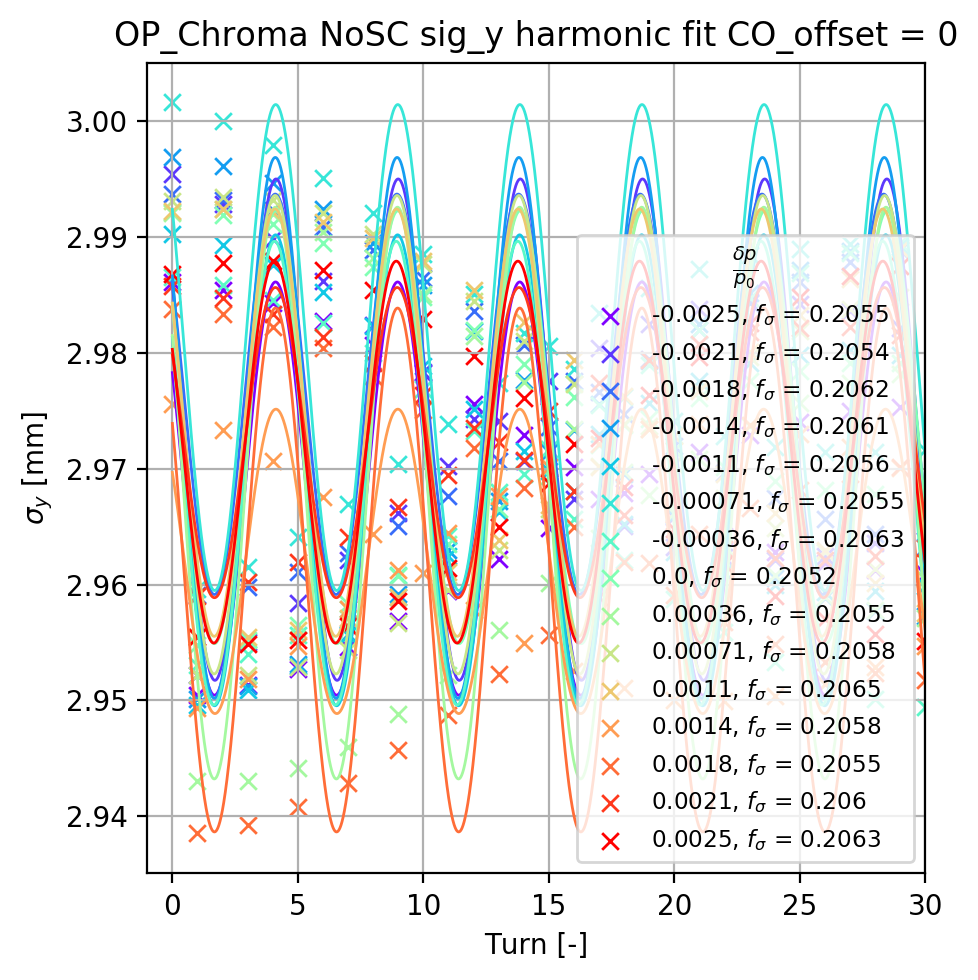

In [16]:
parameter = 'sig_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' harmonic fit CO_offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_y$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)
y_fine = np.array(range(0, 30000))*0.001
#print y_fine

for key, value in sorted(ddo.iteritems()):
#key=0

    y = np.array(range(0, 31))
    x = np.array(ddo[key][parameter][0]*1E3)

    mean_x = np.mean(x)
    if mean_x < 0.0 :
        offset_min = 1.5 * np.mean(x)
        offset_max = 0.5 * np.mean(x)
    else:
        offset_min = 0.5 * np.mean(x)
        offset_max = 1.5 * np.mean(x)    

    amp_min = 0.5 * 0.999 * (np.max(x) - np.min(x))
    amp_max = 0.5 * 1.001 * (np.max(x) - np.min(x))

    freq_min = 0.15001
    freq_max = 0.2499

    popt, pcov = curve_fit(harmonic_fn, ddo[key]['turn'][0]+1, x, method = 'trf', bounds =((offset_min,amp_min,-np.inf,freq_min),(offset_max,amp_max,np.inf,freq_max)))

    print '\n Momentum Offset = ', key
    print ' Offset = ', popt[0], ' mm'
    print ' Amplitude = ', popt[1], ' mm'
    print ' Frequency = ', round(popt[3],4)
    print ' Phase offset = ', popt[2] / (2*np.pi)

    ax1.plot(y_fine, harmonic_fn(y_fine, popt[0], popt[1], popt[2], popt[3]), color=colors[c_it])
    lab_ = str(str(key) + r', $f_{\sigma}$ = ' + str(round(popt[3],4)))
    ax1.scatter(ddo[key]['turn'][0]+1, x, label=lab_, color=colors[c_it], marker='x');
    c_it = c_it + 1
    
    #qy_harmonic.append(popt[3])
        
ax1.legend(fontsize='small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30);
#ax1.set_ylim(-2,2);

savename = save_folder + 'qy_quadrupolar_harmonic.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);


 Momentum Offset =  -0.0025
 Offset =  -0.6573357545307795  mm
 Amplitude =  0.2015230675294137  mm
 Frequency =  0.2203
 Phase offset =  0.690482522830726

 Momentum Offset =  -0.0021
 Offset =  -0.6395846170098637  mm
 Amplitude =  0.2101377744942343  mm
 Frequency =  0.2215
 Phase offset =  0.6393189126818288

 Momentum Offset =  -0.0018
 Offset =  -0.6473027904809187  mm
 Amplitude =  0.21561386751581665  mm
 Frequency =  0.2203
 Phase offset =  0.6890288961806027

 Momentum Offset =  -0.0014
 Offset =  -0.6618944352219519  mm
 Amplitude =  0.20754642764285894  mm
 Frequency =  0.2198
 Phase offset =  0.7102916529893928

 Momentum Offset =  -0.0011
 Offset =  -0.6431721084274612  mm
 Amplitude =  0.20272771269748277  mm
 Frequency =  0.2214
 Phase offset =  0.650390783932597

 Momentum Offset =  -0.00071
 Offset =  -0.6414601287070321  mm
 Amplitude =  0.22111811715638505  mm
 Frequency =  0.22
 Phase offset =  0.6978254662540506

 Momentum Offset =  -0.00036
 Offset =  -0.6537783

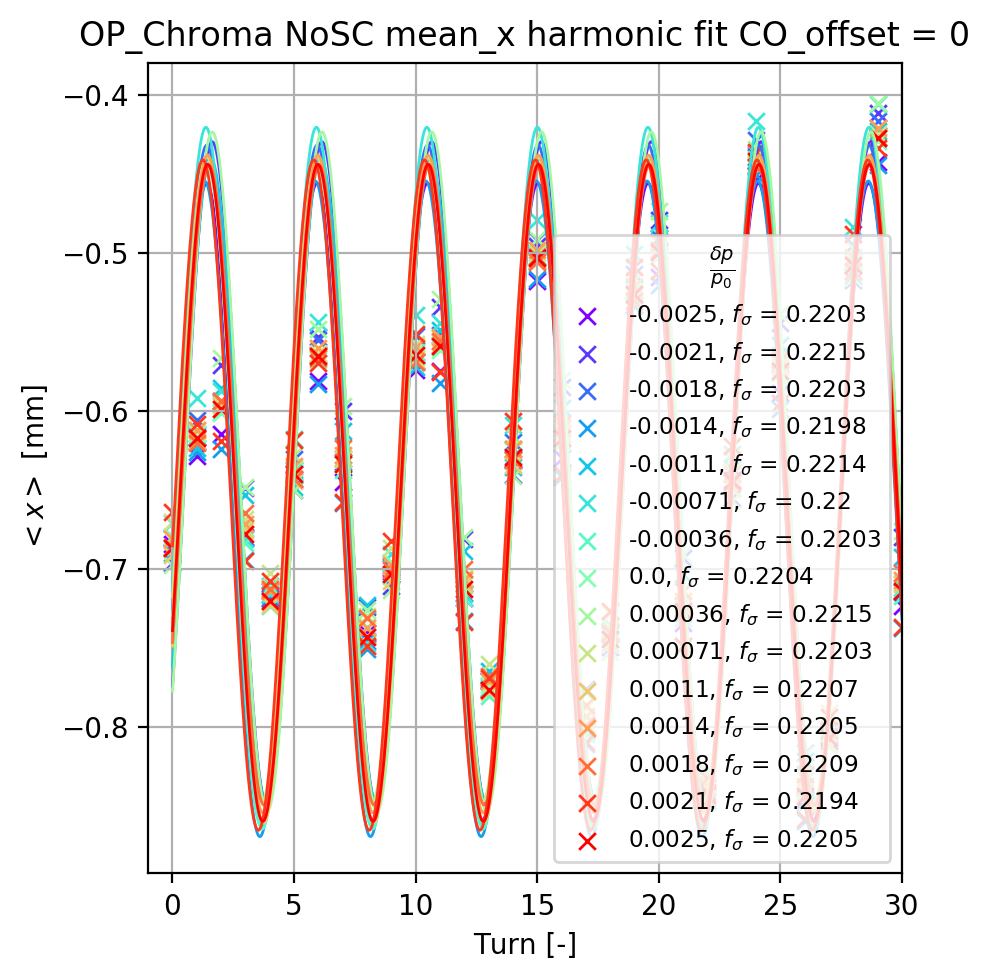

In [17]:
parameter = 'mean_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' harmonic fit CO_offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$<x>$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)
y_fine = np.array(range(0, 30000))*0.001
#print y_fine

for key, value in sorted(ddo.iteritems()):
#key=0

    y = np.array(range(0, 31))
    x = np.array(ddo[key][parameter][0]*1E3)

    mean_x = np.mean(x)
    if mean_x < 0.0 :
        offset_min = 1.5 * np.mean(x)
        offset_max = 0.5 * np.mean(x)
    else:
        offset_min = 0.5 * np.mean(x)
        offset_max = 1.5 * np.mean(x)    

    amp_min = 0.5 * 0.999 * (np.max(x) - np.min(x))
    amp_max = 0.5 * 1.001 * (np.max(x) - np.min(x))

    freq_min = 0.0
    freq_max = 0.49

    popt, pcov = curve_fit(harmonic_fn, ddo[key]['turn'][0]+1, x, method = 'trf', bounds =((offset_min,amp_min,-np.inf,freq_min),(offset_max,amp_max,np.inf,freq_max)))

    print '\n Momentum Offset = ', key
    print ' Offset = ', popt[0], ' mm'
    print ' Amplitude = ', popt[1], ' mm'
    print ' Frequency = ', round(popt[3],4)
    print ' Phase offset = ', popt[2] / (2*np.pi)

    ax1.plot(y_fine, harmonic_fn(y_fine, popt[0], popt[1], popt[2], popt[3]), color=colors[c_it])
    lab_ = str(str(key) + r', $f_{\sigma}$ = ' + str(round(popt[3],4)))
    ax1.scatter(ddo[key]['turn'][0]+1, x, label=lab_, color=colors[c_it], marker='x');
    c_it = c_it + 1
    
    qx_harmonic.append(popt[3])
        
ax1.legend(fontsize='small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30);
#ax1.set_ylim(-2,2);

savename = save_folder + 'qx_harmonic.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);


 Momentum Offset =  -0.0025
 Offset =  0.00010383072726207456  mm
 Amplitude =  0.015973587586895144  mm
 Frequency =  0.2446
 Phase offset =  0.6253295526642223

 Momentum Offset =  -0.0021
 Offset =  1.7384228233333594e-05  mm
 Amplitude =  0.00688072214662045  mm
 Frequency =  0.2452
 Phase offset =  0.5978938208251554

 Momentum Offset =  -0.0018
 Offset =  -2.9810719646716107e-05  mm
 Amplitude =  0.018416690685639024  mm
 Frequency =  0.2445
 Phase offset =  0.5823634020623855

 Momentum Offset =  -0.0014
 Offset =  -4.4628669152664025e-05  mm
 Amplitude =  0.0026477012236562738  mm
 Frequency =  0.2498
 Phase offset =  0.29145282793142474

 Momentum Offset =  -0.0011
 Offset =  1.795130643371505e-05  mm
 Amplitude =  0.006614560525246685  mm
 Frequency =  0.2419
 Phase offset =  0.639882527613719

 Momentum Offset =  -0.00071
 Offset =  -0.000165745894385867  mm
 Amplitude =  0.011743247056615566  mm
 Frequency =  0.2362
 Phase offset =  0.550659739094776

 Momentum Offset =  -

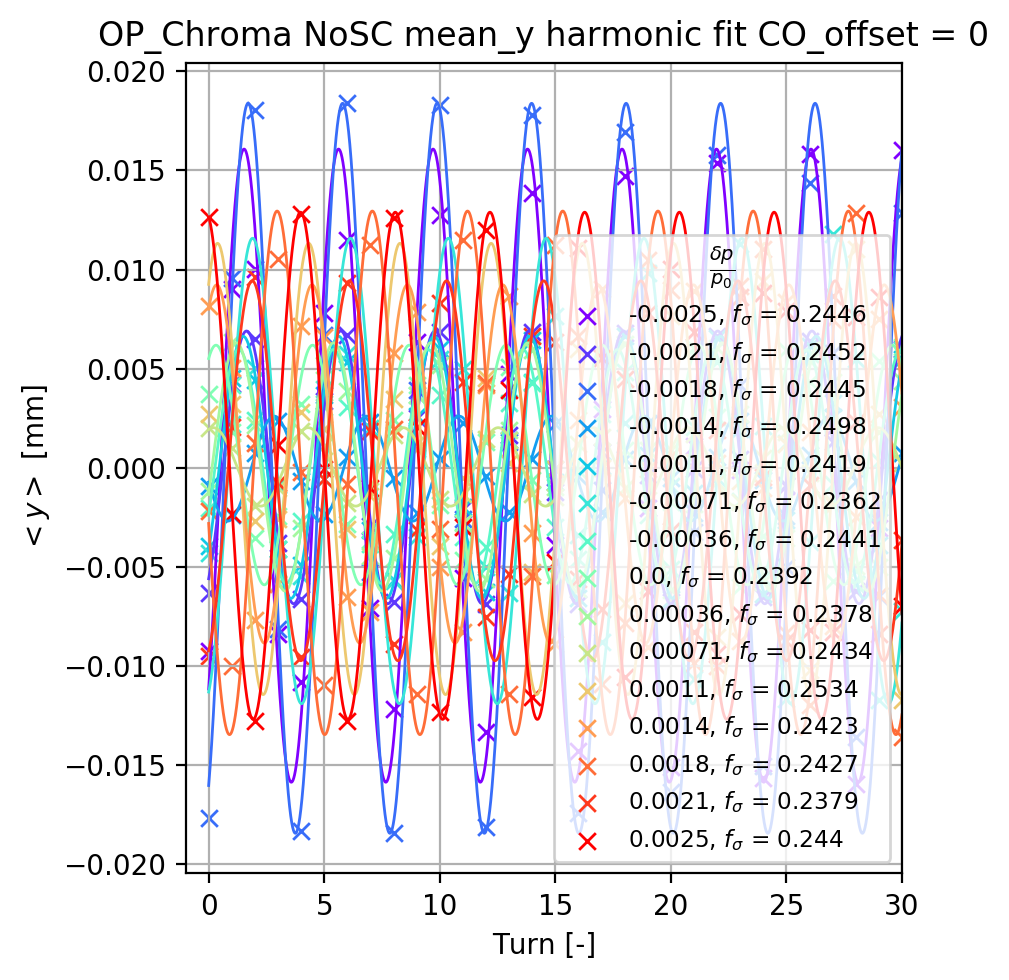

In [18]:
parameter = 'mean_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' harmonic fit CO_offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$<y>$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)
y_fine = np.array(range(0, 30000))*0.001
#print y_fine

for key, value in sorted(ddo.iteritems()):
#key=0

    y = np.array(range(0, 31))
    x = np.array(ddo[key][parameter][0]*1E3)

    mean_x = np.mean(x)
    if mean_x < 0.0 :
        offset_min = 1.5 * np.mean(x)
        offset_max = 0.5 * np.mean(x)
    else:
        offset_min = 0.5 * np.mean(x)
        offset_max = 1.5 * np.mean(x)    

    amp_min = 0.5 * 0.999 * (np.max(x) - np.min(x))
    amp_max = 0.5 * 1.001 * (np.max(x) - np.min(x))

    freq_min = 0.0
    freq_max = 0.499

    popt, pcov = curve_fit(harmonic_fn, ddo[key]['turn'][0]+1, x, method = 'trf', bounds =((offset_min,amp_min,-np.inf,freq_min),(offset_max,amp_max,np.inf,freq_max)))

    print '\n Momentum Offset = ', key
    print ' Offset = ', popt[0], ' mm'
    print ' Amplitude = ', popt[1], ' mm'
    print ' Frequency = ', round(popt[3],4)
    print ' Phase offset = ', popt[2] / (2*np.pi)

    ax1.plot(y_fine, harmonic_fn(y_fine, popt[0], popt[1], popt[2], popt[3]), color=colors[c_it])
    lab_ = str(str(key) + r', $f_{\sigma}$ = ' + str(round(popt[3],4)))
    ax1.scatter(ddo[key]['turn'][0]+1, x, label=lab_, color=colors[c_it], marker='x');
    c_it = c_it + 1
    
    qy_harmonic.append(popt[3])
        
ax1.legend(fontsize='small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30);
#ax1.set_ylim(-2,2);

savename = save_folder + 'qy_harmonic.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

/usr/lib64/python2.7/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


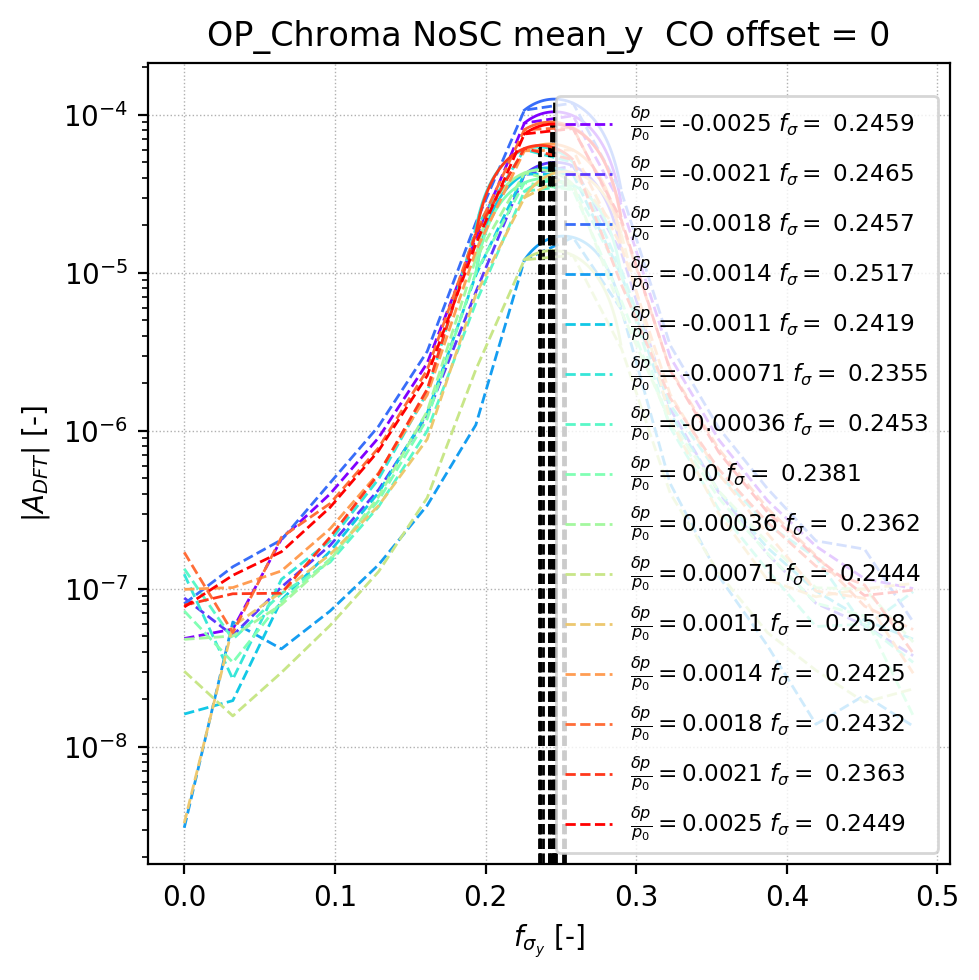

In [19]:
# Store envelope oscillation frequencies
f_sig_y = []

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' mean_y  CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$|A_{DFT}|$ [-]');
ax1.set_xlabel(r'$f_{\sigma_{y}}$ [-]');

N_turns = 31

hann=np.hanning(N_turns)
freq_h = np.fft.rfftfreq(N_turns)

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):

    ampl_h = np.abs(np.fft.rfft(ddo[key]['mean_y'][0]*hann))
    n = np.argmax(ampl_h[4:]) + 4
    popt, pcov = curve_fit(quadratic,freq_h[n-1:n+2],ampl_h[n-1:n+2])
    f_range = np.arange(freq_h[n-1],freq_h[n+1],0.001)
    f_max = -1*popt[1]/(2*popt[0])
    a_max = quadratic(f_max,popt[0],popt[1],popt[2])
    lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(f_max,4))
    plt.semilogy(freq_h,ampl_h,'b', label = lab_, color=colors[c_it], ls='--')
    plt.semilogy([f_max, f_max], [0, a_max],'--k')
    plt.semilogy(f_range,quadratic(f_range,popt[0],popt[1],popt[2]), color=colors[c_it])
    f_max = -1*popt[1]/(2*popt[0])
    c_it = c_it + 1
        
    f_sig_y.append(f_max)
    qy_fft.append(f_max)
    
ax1.legend(loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'y_fft.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

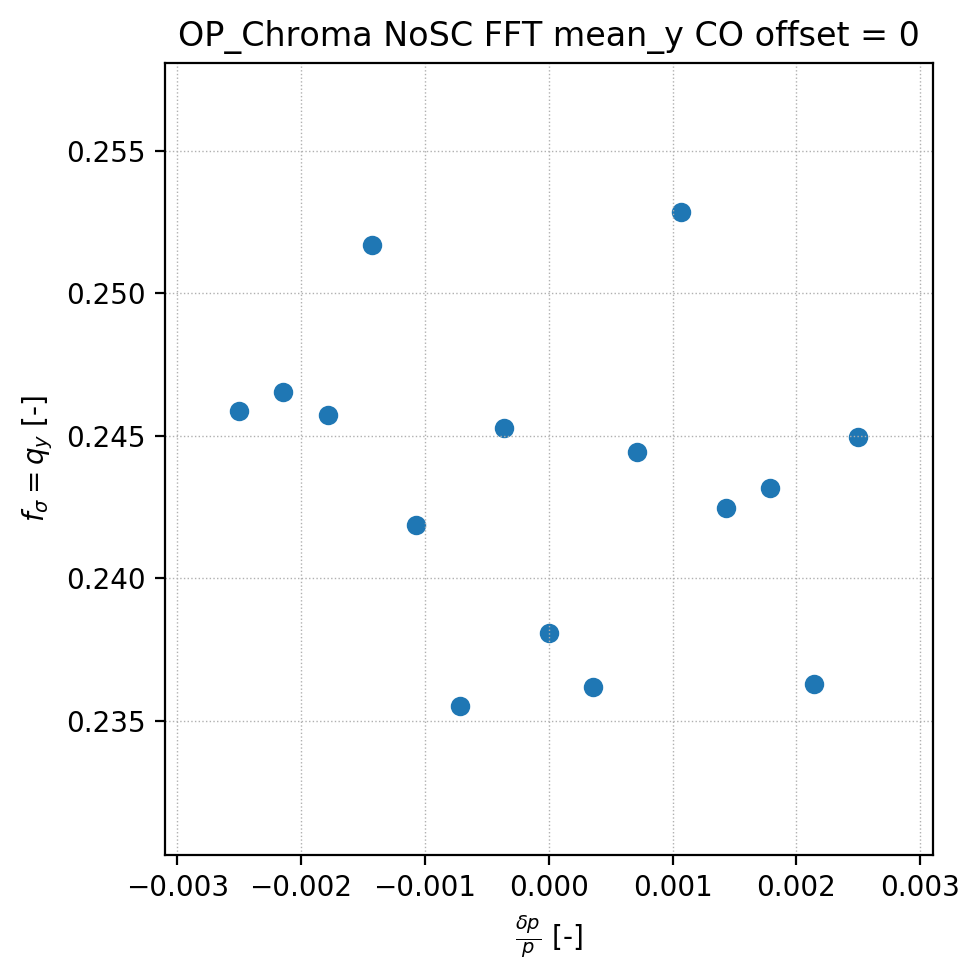

In [20]:
fig1 = plt.figure(facecolor='w', edgecolor='k');
ax1 = fig1.add_subplot(111);

tit = main_label + ' ' + sc + ' FFT mean_y CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_y$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

dps = np.linspace(-2.5E-3, 2.5E-3, num_sims)

ax1.scatter(dps, f_sig_y);
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.215, 0.245);

savename = save_folder + 'qy.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

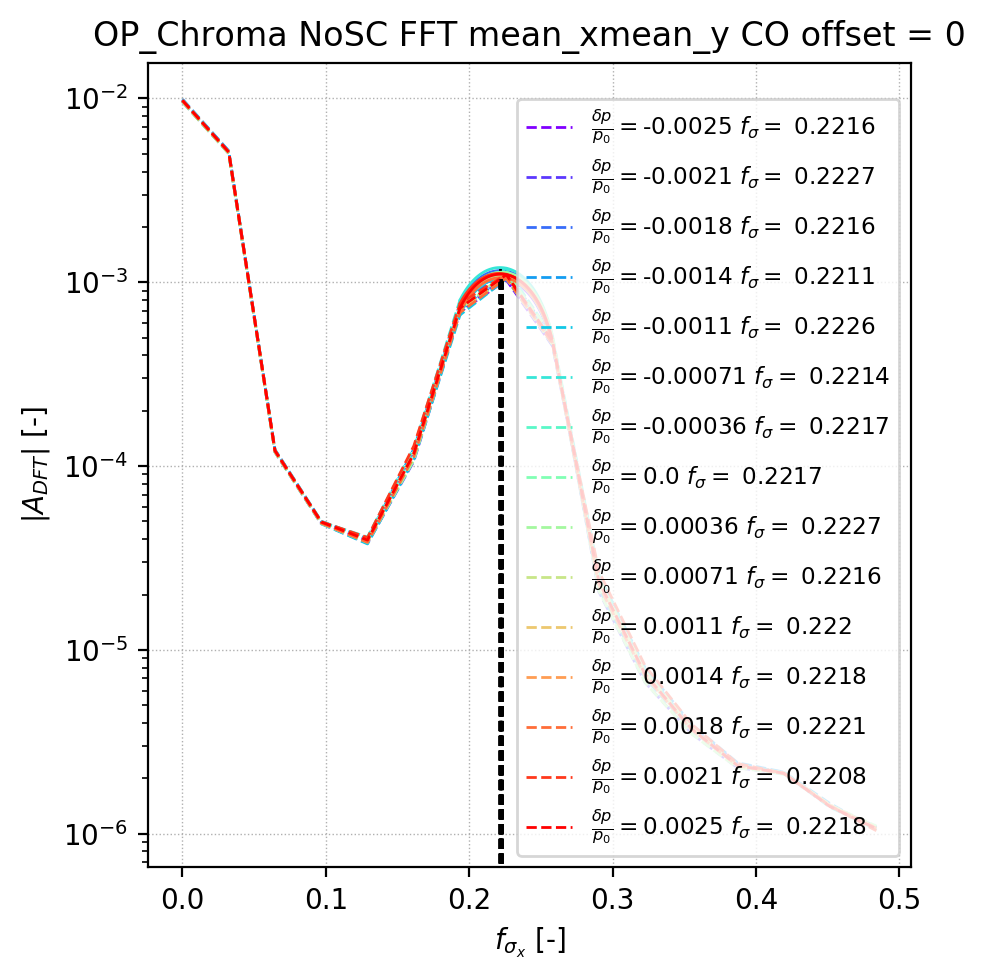

In [21]:
# Store envelope oscillation frequencies
f_sig_x = []

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' FFT mean_x' + parameter + ' CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$|A_{DFT}|$ [-]');
ax1.set_xlabel(r'$f_{\sigma_{x}}$ [-]');

N_turns = 31

hann=np.hanning(N_turns)
freq_h = np.fft.rfftfreq(N_turns)

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):

    ampl_h = np.abs(np.fft.rfft(ddo[key]['mean_x'][0]*hann))
    n = np.argmax(ampl_h[4:]) + 4
    popt, pcov = curve_fit(quadratic,freq_h[n-1:n+2],ampl_h[n-1:n+2])
    f_range = np.arange(freq_h[n-1],freq_h[n+1],0.001)
    f_max = -1*popt[1]/(2*popt[0])
    a_max = quadratic(f_max,popt[0],popt[1],popt[2])
    lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(f_max,4))
    plt.semilogy(freq_h,ampl_h,'b', label = lab_, color=colors[c_it], ls='--')
    plt.semilogy([f_max, f_max], [0, a_max],'--k')
    plt.semilogy(f_range,quadratic(f_range,popt[0],popt[1],popt[2]), color=colors[c_it])
    f_max = -1*popt[1]/(2*popt[0])
    c_it = c_it + 1
        
    f_sig_x.append(f_max)
    qx_fft.append(f_max)
    
ax1.legend(fontsize='small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'x_fft.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

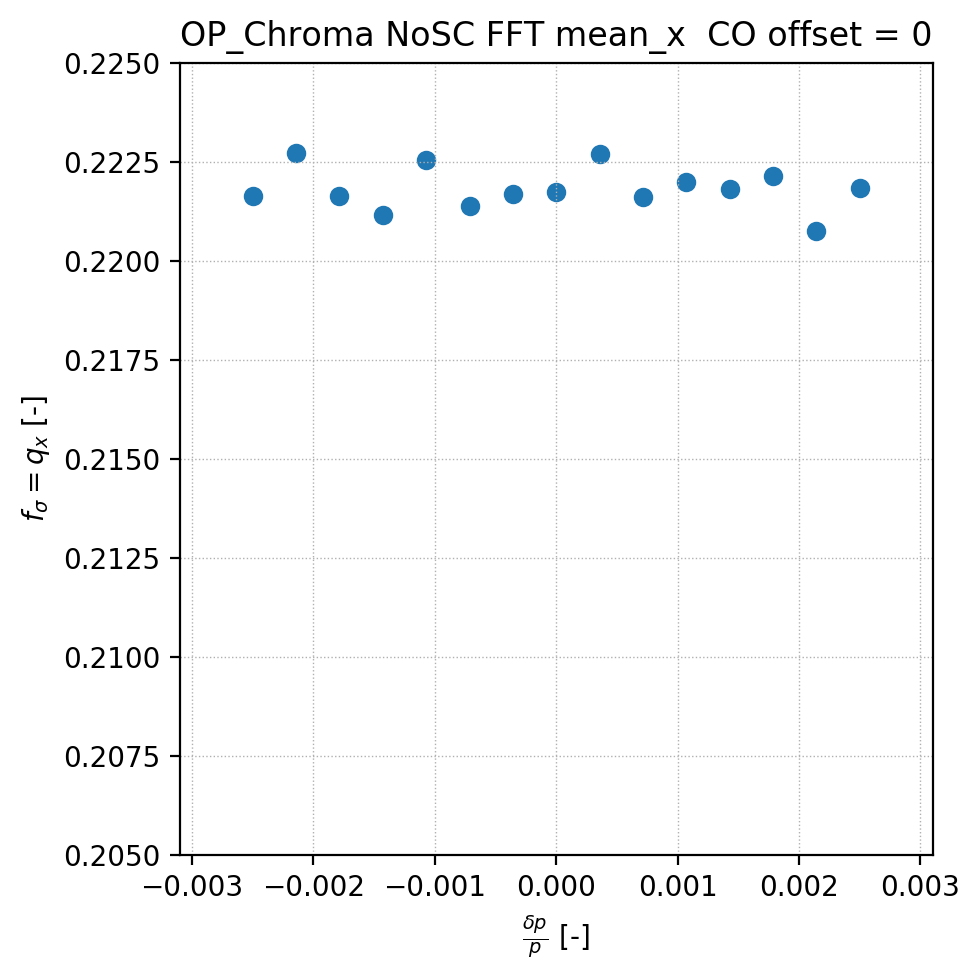

In [22]:
fig1 = plt.figure(facecolor='w', edgecolor='k');
ax1 = fig1.add_subplot(111);

tit = main_label + ' ' + sc + ' FFT mean_x  CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_x$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

dps = np.linspace(-2.5E-3, 2.5E-3, num_sims)
ax1.scatter(dps, f_sig_x);
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
ax1.set_ylim(0.205, 0.225);

savename = save_folder + 'qx.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

# Calculate tunes using NAFF

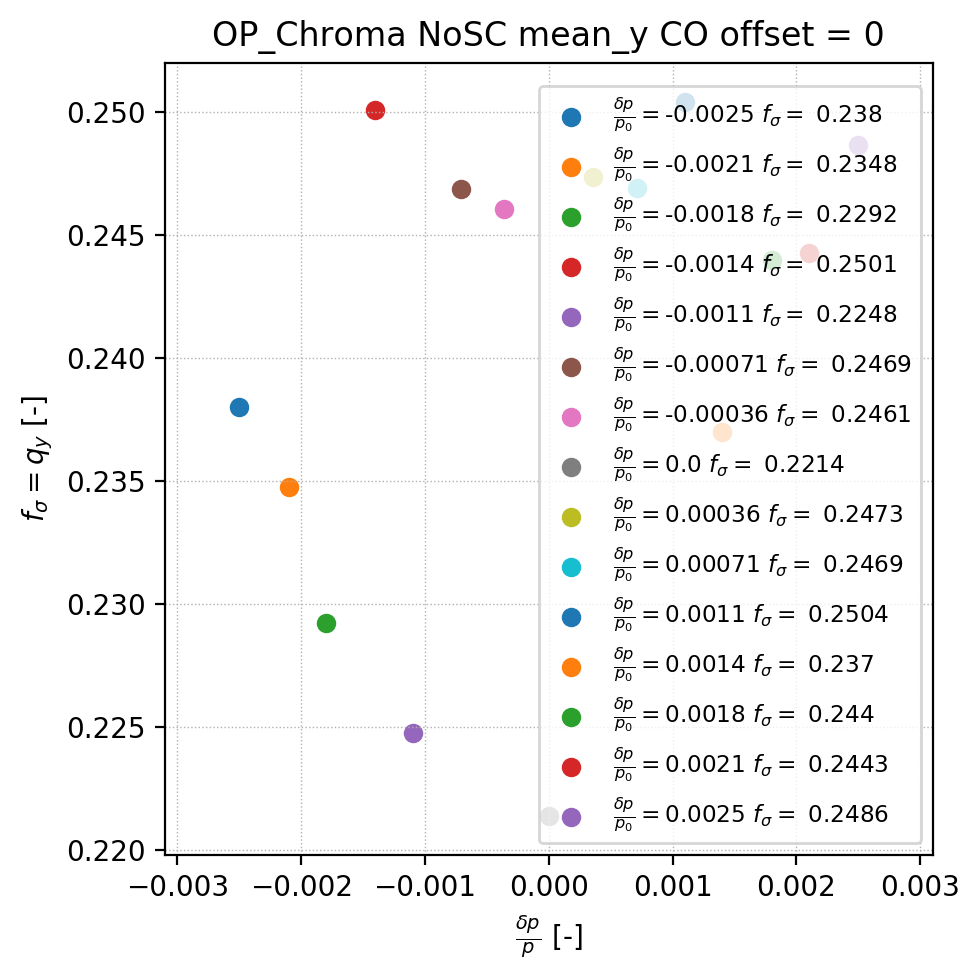

In [23]:
parameter = 'mean_y'
        
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_y$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.215, 0.245);

skiptrns= 4
N_turns = 31 - skiptrns

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):    
    y = (ddo[key][parameter][0]-np.mean(ddo[key][parameter][0]))
    try:
        if key == 0.0: 
            skiptrns = 3
            N_turns = 31 - skiptrns
        elif key == 0.001: 
            skiptrns = 3
            N_turns = 31 - skiptrns
        elif key == 0.002: 
            skiptrns = 3
            N_turns = 31 - skiptrns
        elif key == 0.003: 
            skiptrns = 3
            N_turns = 31 - skiptrns
        #print skiptrns
        freq = pnf.naff(y, turns=N_turns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(freq,4)) 
        ax1.scatter(float(key), freq, label=str(lab_))
    except IndexError:
        continue 

        
    f_sig_x.append(freq)
    qy_naff.append(freq)
    
ax1.legend(fontsize='small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qy_naff.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

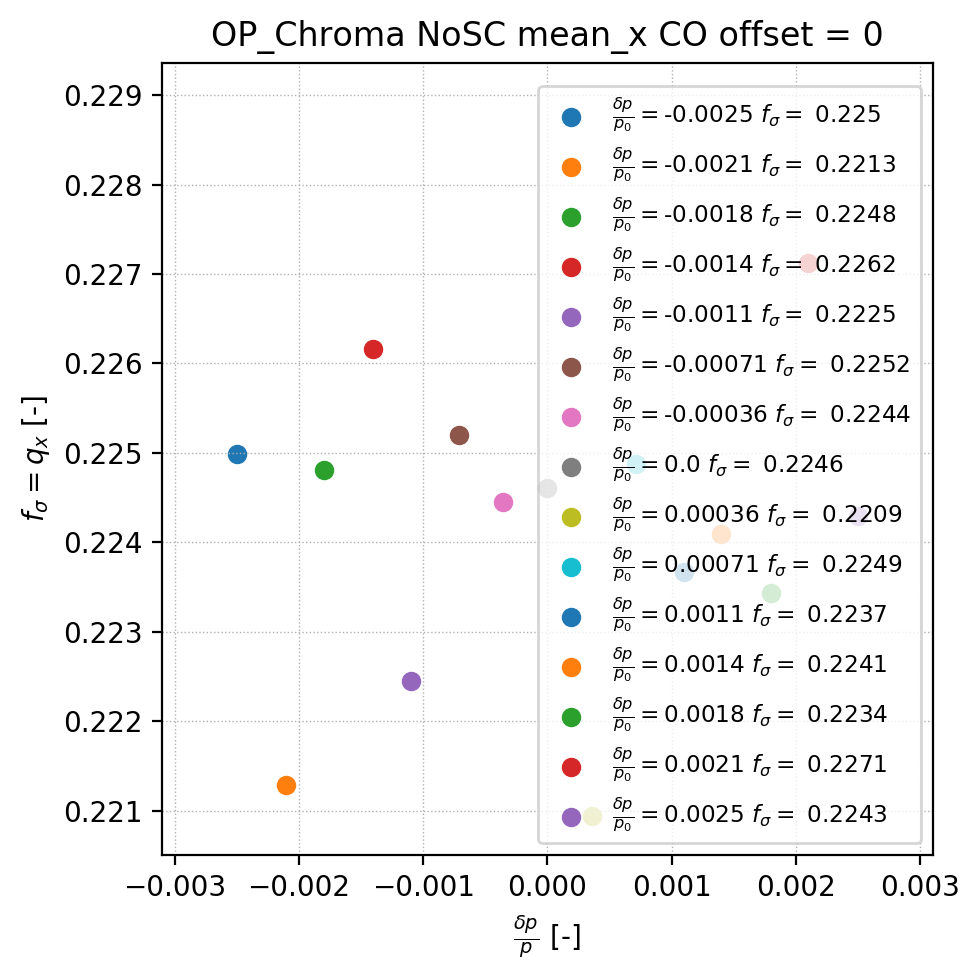

In [24]:
parameter = 'mean_x'
        
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_x$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.205, 0.225);

skiptrns= 6
N_turns = 31 - skiptrns

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):    
    y = (ddo[key][parameter][0]-np.mean(ddo[key][parameter][0]))
    try:
        freq = pnf.naff(y, turns=N_turns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(freq,4)) 
        ax1.scatter(float(key), freq, label=str(lab_))
    except IndexError:
        continue 
        
    f_sig_x.append(freq)
    qx_naff.append(freq)
    
ax1.legend(fontsize='small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qx_naff.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

# Compare different calculated tunes

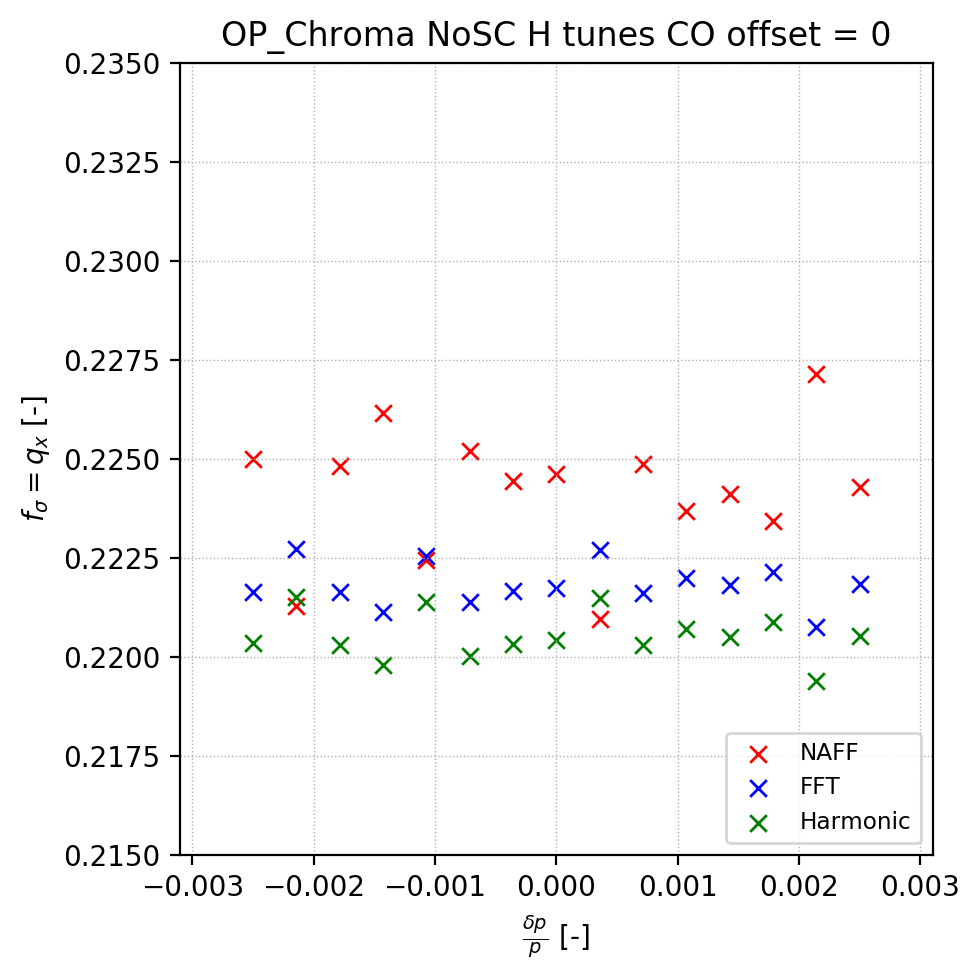

In [25]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' H tunes CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_x$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
ax1.set_ylim(0.215, 0.235);

dps = np.linspace(-2.5E-3, 2.5E-3, num_sims)

ax1.scatter(dps, qx_naff, label='NAFF', color='r', marker='x');
ax1.scatter(dps, qx_fft, label='FFT', color='b', marker='x');
ax1.scatter(dps, qx_harmonic, label='Harmonic', color='g', marker='x');

ax1.legend(fontsize='small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qx_cf.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

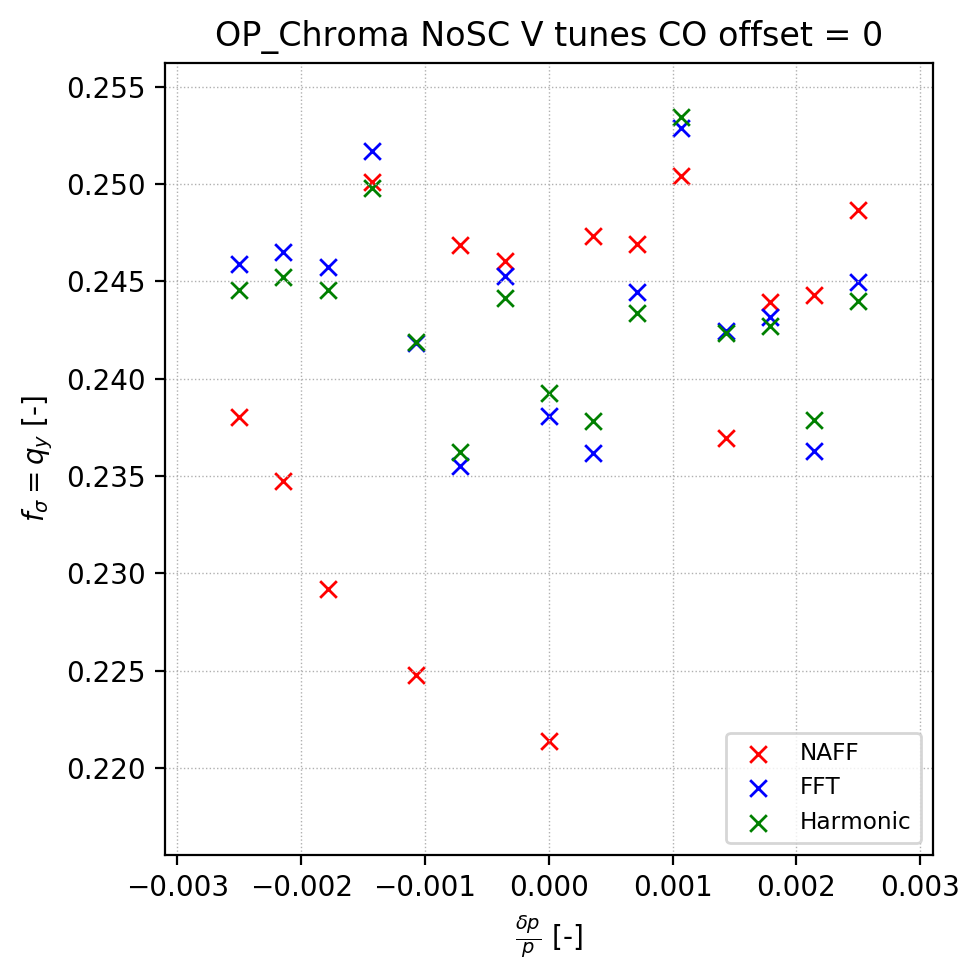

In [26]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' V tunes CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_y$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.205, 0.225);

dps = np.linspace(-2.5E-3, 2.5E-3, num_sims)

ax1.scatter(dps, qy_naff, label='NAFF', color='r', marker='x');
ax1.scatter(dps, qy_fft, label='FFT', color='b', marker='x');
ax1.scatter(dps, qy_harmonic, label='Harmonic', color='g', marker='x');

ax1.legend(fontsize='small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qy_cf.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);